In [43]:
import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt
from json_shot_scraper import flatten_shot
from player_scraper import flatten_player

%matplotlib inline

In [3]:
with open ('data/test.json') as f:
    data = json.load(f)
    game_id = 448628

In [4]:
data['incidences'].keys()

dict_keys(['goals', 'substitutions', 'clearances', 'cornerKicks', 'correctPasses', 'fouls', 'incorrectPasses', 'offsides', 'redCards', 'shots', 'status', 'stealings', 'yellowCards', 'throwIn', 'goalkick', 'nutmegs', 'sombreros', 'penaltyShootout'])

## Shot data Coordinates

In [5]:
shots = list(data['incidences']['shots'].items())

In [6]:
shot_list_dicts = [flatten_shot(shot, game_id) for shot in shots]

In [7]:
shot_df = pd.DataFrame(shot_list_dicts)

In [20]:
shot_df.head()

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id
0,382.0,-0.68,-0.94,-0.31,-0.18,-1,0.86,448628,145031,23169781,35,1,5,9,490
1,36751.0,0.76,0.95,0.40,-0.08,-1,0.83,448628,47808,23169915,35,1,11,39,122
2,NaN,0.87,0.99,0.37,0.14,-1,-1.00,448628,30266,23169922,33,1,12,18,122
3,NaN,0.77,0.96,0.01,-0.02,-1,0.98,448628,29345,23170432,34,1,25,53,122
4,NaN,0.72,1.00,0.10,-0.11,-1,-1.00,448628,29345,23170506,33,1,27,58,122


In [55]:
shot_df['shot_type'].describe()

count    24.000000
mean     31.541667
std       6.990547
min       9.000000
25%      33.000000
50%      33.000000
75%      34.000000
max      35.000000
Name: shot_type, dtype: float64

position of shooter

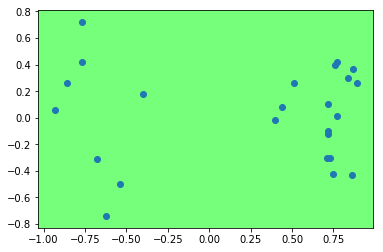

In [10]:
fig, ax = plt.subplots()
ax.scatter(shot_df['coord_x1'], shot_df['coord_y1'])
ax.set_facecolor('xkcd:lightgreen')


final position of shot

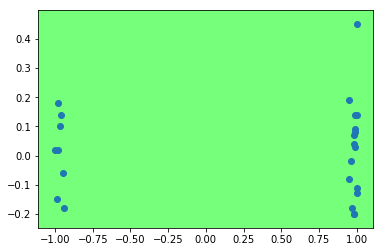

In [11]:
fig, ax = plt.subplots()
ax.scatter(shot_df['coord_x2'], shot_df['coord_y2'])
ax.set_facecolor('xkcd:lightgreen')

## Shot Data - looking to match shot_id with shot result

In [12]:
data['summary'].keys()

dict_keys(['assists', 'substitutions', 'clearances', 'cornerKicks', 'fouls', 'foulsReceived', 'goals', 'goalByHead', 'penaltyGoal', 'goalByFreeKick', 'ownGoal', 'correctPasses', 'incorrectPasses', 'allPasses', 'playersPasses', 'offsides', 'redCards', 'redByDoubleYellowCard', 'shots', 'shotsOnTarget', 'shotsOnWoodwork', 'shotsOffTarget', 'freeKicks', 'saves', 'stealings', 'yellowCards', 'ballPossesion'])

In [23]:
list(data['summary']['goals'].items())

[('homeQty', 2), ('awayQty', 0), ('perPlayerQty', {'30266': 1, '163289': 1})]

In [53]:
list(data['summary']['shots'].items())

[('homeQty', 12),
 ('awayQty', 12),
 ('perPlayerQty',
  {'47808': 2,
   '55627': 1,
   '63356': 1,
   '29345': 2,
   '30266': 4,
   '163289': 2,
   '99085': 2,
   '70512': 1,
   '186030': 3,
   '145031': 1,
   '15113': 3,
   '52418': 2})]

In [54]:
list(data['summary']['shotsOnTarget'].items())

[('homeQty', 1),
 ('awayQty', 4),
 ('perPlayerQty',
  {'47808': 1, '99085': 1, '70512': 1, '145031': 1, '52418': 1})]

## Players

In [24]:
data['players'].keys()

dict_keys(['382', '8724', '205120', '137579', '47808', '89096', '37856', '10752', '55627', '45616', '114498', '63356', '96979', '20478', '29345', '30266', '62815', '163289', '179612', '36751', '45387', '94965', '99085', '100778', '70512', '2970', '186030', '145031', '98359', '126700', '15393', '19308', '56334', '15113', '52418', '94781', '57154', '3596'])

In [27]:
list(data['players']['382']['name'].items())

[('first', 'Luciano'),
 ('middle', None),
 ('last', 'Pocrnjic'),
 ('nick', None),
 ('shortName', 'Luciano Pocrnjic')]

In [29]:
list(data['players']['382'].items())

[('teamId', 122),
 ('squadNo', 1),
 ('posnId', 1),
 ('substitute', False),
 ('order', 1),
 ('playMaker', False),
 ('captain', True),
 ('name',
  {'first': 'Luciano',
   'middle': None,
   'last': 'Pocrnjic',
   'nick': None,
   'shortName': 'Luciano Pocrnjic'}),
 ('gender', 'm'),
 ('rating', '6.9')]

In [40]:
players = list(data['players'].items())

In [42]:
players[0]

('382',
 {'teamId': 122,
  'squadNo': 1,
  'posnId': 1,
  'substitute': False,
  'order': 1,
  'playMaker': False,
  'captain': True,
  'name': {'first': 'Luciano',
   'middle': None,
   'last': 'Pocrnjic',
   'nick': None,
   'shortName': 'Luciano Pocrnjic'},
  'gender': 'm',
  'rating': '6.9'})

In [49]:
player_list_dicts = [flatten_player(player) for player in players]

In [50]:
player_df = pd.DataFrame(player_list_dicts)

In [51]:
player_df

,name,player_id,position_id,squad_number,team_id
0,Luciano Pocrnjic,382,1,1.0,122
1,Fabián Assmann,8724,1,35.0,122
2,Emanuel Iñíguez,205120,2,21.0,122
3,Emiliano Amor,137579,2,32.0,122
4,Leonel Galeano,47808,2,6.0,122
5,Lucas Villalba,89096,2,23.0,122
6,Ismael Quilez,37856,2,4.0,122
7,Leonardo Sánchez,10752,2,16.0,122
8,Nahuel Yeri,55627,3,25.0,122
9,Fernando Godoy,45616,3,15.0,122
